# **Hysteresis**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

In [4]:
def EmbeddingAlg(param_list, guess, F):
    """
    Blue
    """
    X = []
    for param in param_list:
        try:
            # Solve for x_value making F(x_value, param) = 0.
            x_value = newton(F, guess, fprime=None, args=(param,), tol=1E-7, maxiter=50)
            # Record the solution and update guess for the next iteration.
            X.append(x_value)
            guess = x_value
        except RuntimeError:
            # If Newton's method fails, return a truncated list of parameters
            # with the corresponding x values.
            return param_list[:len(X)], X
    # Return the list of parameters and the corresponding x values.
    return param_list, X

def F(x, lmbda):
    return x**2 + lmbda

# Top curve shown in the bifurcation diagram
C1, X1 = EmbeddingAlg(np.linspace(-5, 0, 200), np.sqrt(5), F)
# The bottom curve
C2, X2 = EmbeddingAlg(np.linspace(-5, 0, 200), -np.sqrt(5), F)

In [22]:
def PlotEmbedding(ylim,title,F):
    C1, X1 = EmbeddingAlg(np.linspace(5, -5, 200), np.sqrt(5), F)
    C2, X2 = EmbeddingAlg(np.linspace(5, -5, 200), -np.sqrt(5), F)
    C3, X3 = EmbeddingAlg(np.linspace(5, -5, 200), np.sqrt(0), F)
    plt.plot(C1,X1)
    plt.plot(C2,X2)
    plt.plot(C3,X3)
    plt.title(title)
    plt.show()

### Problem 1

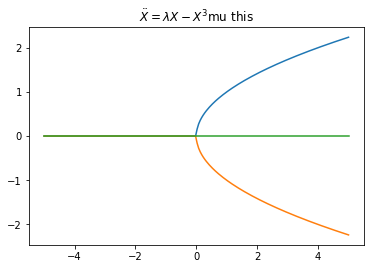

In [32]:
F1 = lambda x,lam: x*lam - x**3
PlotEmbedding([-2.1,2.1],r'$\ddot{X} = \lambda X  -X^3$',F1)

### Problem 2

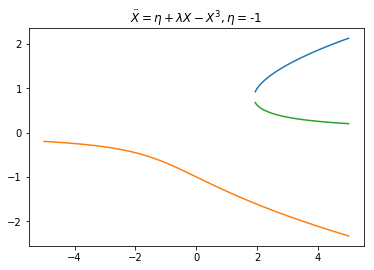

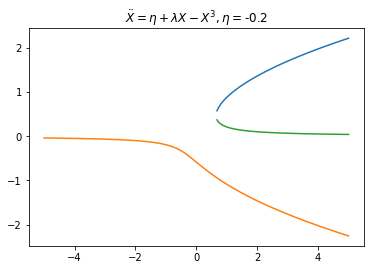

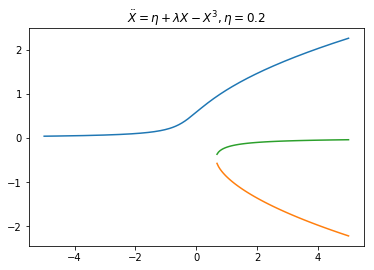

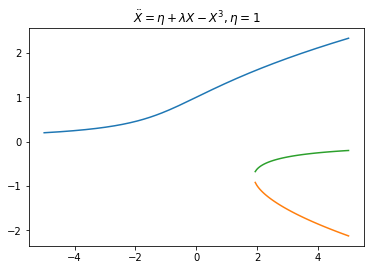

In [37]:
for i in range(4):
F1 = lambda x,lam: mu[i] + x*lam - x**3
PlotEmbedding([-2.1,2.1],r'$\dot{X} = \eta + \lambda X  -X^3,  \eta = $'+str(mu[i]),F1)

In [157]:
def PlotEmbedding3(ylim,title,F):
    C1, X1 = EmbeddingAlg(np.linspace(2, 10, 200), 2, F)
    C2, X2 = EmbeddingAlg(np.linspace(6.274, 15, 200)[::-1], 10, F)
    C3, X3 = EmbeddingAlg(np.linspace(6.45, 10, 200), 2.5, F)
    plt.plot(C1,X1,label="Stable")
    plt.plot(C2,X2,label="Stable")
    plt.plot(C3,X3,"--",label="Unstable")
    plt.title(title)
    plt.legend(loc='upper left')
    plt.ylim(ylim[0],ylim[1])
    plt.show()

### Problem 3

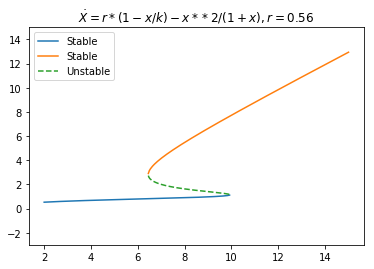

In [158]:
r = 0.56
F4 = lambda x,k: r*x*(1-x/k) - x**2/(1+x**2)
PlotEmbedding3([-3,15], r'$\dot{X} = r*(1-x/k) -x**2/(1+x),  r = $'+str(r), F4)
